<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S I S T E M A  -   D   E  -  I N V E N T A R I O S

La demanda mensual de un cierto producto, sigue la siguiente distribución de probabilidad empírica:

![texto alternativo](https://drive.google.com/uc?id=1i2BtgMyQSJWOi10G1a9UePcG8VItpgzJ)

El tiempo de entrega está distribuido de acuerdo a la siguiente función de probabilidad:

![texto alternativo](https://drive.google.com/uc?id=1VsRSh1p00wfRk-xqdk6YuxcNu0d_Uc6x)

Los factores estacionales para cada uno de los meses del año son como se muestra acontinuación:

![texto alternativo](https://drive.google.com/uc?id=1ei4oObcvT8qq2J77MLS8ar3EIEaWhTfh)

La información con respecto a los costos relevantes es la siguiente:

$$\text{Costo de ordenar = } \$ 100 \text{ /orden}$$ $$\text{Costo de inventario = } \$ 20 \text{ /unidad/año}$$ $$\text{Costo de faltante = } \$ 50 \text{ /unidad}$$

Si el inventario inicial se asume en 150 unidades, ¿ determine la cantidad óptima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$?




S   O   L   U   C    I    Ó    N

In [61]:
#Importamos las librerias necesarias
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [62]:
def demanda():                            #Esta función calcula y devuelve la demanda
  prob=[0,0.01,0.025,0.045,0.065, 0.087,0.11,0.135,0.162,0.19,0.219,0.254,0.299,0.359,0.424,0.494,0.574,0.649,0.719,0.784,0.844, 0.894,0.934,0.964,0.980,0.995,1]
  u=rnd.random()
  for i in range(len(prob)):
      if prob[i-1] <= u <= prob[i]:       #Ubica el valor de u en inervalos
          x=i+34                          #Asigna valor de demanda
          break
  return x,u

In [63]:
def demanda_ajustada(x,mes):              #Esta fución calcula y devuelve la demanda ajustada
  factor_mes=[1.2, 1, 0.9, 0.8, 0.8 ,0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
  for j in range(len(factor_mes)):
    if mes==j:                            #Ubica el mes
      x=round(x*factor_mes[j-1])          #multiplica por el factor
  return x

In [64]:
def entrega(carga_pend,cont_ent):                  #Esta función calcula y devuelve el tiempo de entrega (y estatus de entrega pendiente)
  carga_pend=True                         #Indica que hay entrega pendiente

  v=rnd.random()
  if 0<= v < 0.3:                         #Asigna valor a el tiempo de entrega
    entrega=1
  elif 0.3 <= v < 0.7:
    entrega=2
  elif 0.7 <= v < 1:
    entrega=3
  cont_ent+=1
  return  entrega,carga_pend,cont_ent


In [65]:
#Asigna valores iniciales

inv_inicial=150
inventario_i=[150]                          #Guarda inventario inicial en una lista
inv_falt=0
carga_pend=False                            #Indica que no hay carga pendiente
t_entrega=0                                 #No hay tiempo de entrega
cont=-1                                     #Contador para recibir la entrega (inicia en -1 para comenzar a contar desde la sig. iteracion)
faltante=0                                  #Demanda faltante
data=[]                                     #Lista para imprimir tabla
cont_ent=0
q=200
R=100
for m in range(12):                         #Ciclo de 12 meses
  mes=m+1
  dem,val=demanda()                         #Calcula demanda y número aleatorio generado para el mes correspondiente
  dem_ajus=demanda_ajustada(dem,mes)        #Calcula demanda ajustada

  inv_final=inv_inicial-dem_ajus            #Calcula demanda final
  inv_men_prom=(inv_inicial+dem_ajus)/2     #Calcula demanda promedio mensual



  if inv_final<=R and carga_pend==False:    #Condición: Se pasó el punto de reorden y no hay carga pendiente
    t_entrega,carga_pend,cont_ent=entrega(carga_pend,cont_ent)  #Calucla tiempo de entrega

  if carga_pend==True:                        #Contador para recibir la entrega aumenta en 1
    cont+=1

  if inv_final<0:                             #Si el inventario final es negativo, se imprime "-"
    faltante=abs(inv_final)
    data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{t_entrega}",f"{np.round(inv_inicial**2/(2*dem_ajus))}"])
    inv_falt+=faltante
  else:
    data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{t_entrega}",f"{np.round(inv_men_prom)}"])

  inv_inicial=inv_final                       #Inventario final pasa a ser inventario incial en el siguiente mes

  if cont==t_entrega:                         #Condición: Se cumple tiempo de entrega
    cont=-1                                   #Reinicia contador
    inv_inicial+=q                          #Aumenta el inventario +200
    carga_pend=False                          #Indica que ya no hay carga pendiente
    t_entrega=0                               #Reinicia tiempo de entrega

  faltante=0                                  #Reinicia inv. faltante
  inventario_i.append(inv_inicial)            #Guarda inventario inicial en una lista

#Imprime tabla
headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False))


╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │       0.759556  │        53 │                 64 │ 86                 │          0 │         3 │                           107 │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   86 │       0.0898383 │        40 │                 40 │ 46                 │          0 │         3 │                            63 │
├───────┼───────────────────

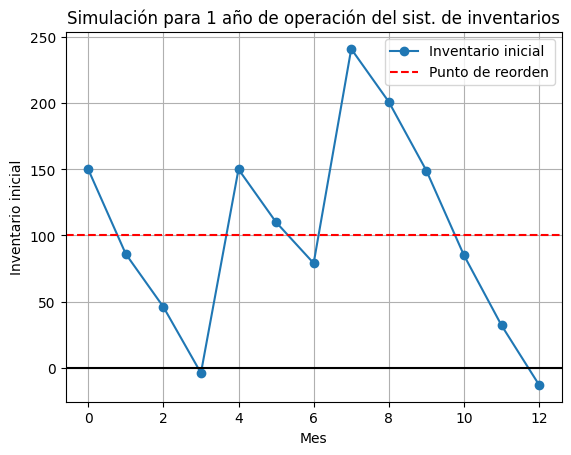

In [66]:
#Imprime gráfica
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="red",linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
suma_inv_prom = 0
for fila in data:
    valor_str = fila[-1]
    suma_inv_prom += float(valor_str)

costo=[cont_ent*R, suma_inv_prom*1.67 ,inv_falt*50,cont_ent*R+suma_inv_prom*1.67+inv_falt*50]
print(costo)

[300, 1456.24, 7050, 8806.24]


In [67]:
def experimento(q,R):
  inv_inicial=150
  inventario_i=[150]                          #Guarda inventario inicial en una lista
  inv_falt=0
  carga_pend=False                            #Indica que no hay carga pendiente
  t_entrega=0                                 #No hay tiempo de entrega
  cont=-1                                     #Contador para recibir la entrega (inicia en -1 para comenzar a contar desde la sig. iteracion)
  faltante=0                                  #Demanda faltante
  data=[]                                     #Lista para imprimir tabla
  cont_ent=0
  for m in range(12):                         #Ciclo de 12 meses
    mes=m+1
    dem,val=demanda()                         #Calcula demanda y número aleatorio generado para el mes correspondiente
    dem_ajus=demanda_ajustada(dem,mes)        #Calcula demanda ajustada

    inv_final=inv_inicial-dem_ajus            #Calcula demanda final
    inv_men_prom=(inv_inicial+dem_ajus)/2     #Calcula demanda promedio mensual



    if inv_final<=R and carga_pend==False:    #Condición: Se pasó el punto de reorden y no hay carga pendiente
      t_entrega,carga_pend,cont_ent=entrega(carga_pend,cont_ent)  #Calucla tiempo de entrega

    if carga_pend==True:                        #Contador para recibir la entrega aumenta en 1
      cont+=1

    if inv_final<0:                             #Si el inventario final es negativo, se imprime "-"
      faltante=abs(inv_final)
      data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{t_entrega}",f"{np.round(inv_inicial**2/(2*dem_ajus))}"])
      inv_falt+=faltante
    else:
      data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{t_entrega}",f"{np.round(inv_men_prom)}"])

    inv_inicial=inv_final                       #Inventario final pasa a ser inventario incial en el siguiente mes

    if cont==t_entrega:                         #Condición: Se cumple tiempo de entrega
      cont=-1                                   #Reinicia contador
      inv_inicial+=q                          #Aumenta el inventario +200
      carga_pend=False                          #Indica que ya no hay carga pendiente
      t_entrega=0                               #Reinicia tiempo de entrega

    faltante=0                                  #Reinicia inv. faltante
    inventario_i.append(inv_inicial)            #Guarda inventario inicial en una lista

  #Imprime tabla
  headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
  #print(tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False))

  suma_inv_prom = 0
  for fila in data:
    # Asumiendo que 'Inventario mensual promedio' es la última columna
    valor_str = fila[-1]
    suma_inv_prom += float(valor_str)

  costo=[cont_ent*R, suma_inv_prom*1.67 ,inv_falt*50,cont_ent*R+suma_inv_prom*1.67+inv_falt*50]
  #print(costo)
  return cont_ent*R+suma_inv_prom*1.67+inv_falt*50

In [68]:
EXP=experimento(100,200)

In [69]:
EXP

7378.72

In [70]:
from scipy.optimize import minimize

def fun_obj(Z):
  q,R= Z
  return experimento(q,R)

def opti():
  valores_iniciales = [200, 100]
  resultado=minimize(fun_obj,valores_iniciales,method='BFGS')

  print('R:',resultado.x[0])
  print('q:',resultado.x[1])
  return resultado.x[0],resultado.x[1]



In [71]:
Res=opti()
print(Res)
Optimizacion=experimento(R,q)
Optimizacion

R: 200.00000707130454
q: 100.0000077760939
(200.00000707130454, 100.0000077760939)


8543.85